# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Explainer-Notebook" data-toc-modified-id="Explainer-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explainer Notebook</a></div><div class="lev2 toc-item"><a href="#Motivation" data-toc-modified-id="Motivation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivation</a></div><div class="lev2 toc-item"><a href="#Basic-Stats" data-toc-modified-id="Basic-Stats-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basic Stats</a></div><div class="lev2 toc-item"><a href="#Tools,-theory-and-analysis" data-toc-modified-id="Tools,-theory-and-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tools, theory and analysis</a></div><div class="lev3 toc-item"><a href="#Degree-of-Graph" data-toc-modified-id="Degree-of-Graph-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Degree of Graph</a></div><div class="lev3 toc-item"><a href="#Degree-distribution" data-toc-modified-id="Degree-distribution-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Degree distribution</a></div><div class="lev3 toc-item"><a href="#Centrality" data-toc-modified-id="Centrality-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Centrality</a></div><div class="lev3 toc-item"><a href="#Communities" data-toc-modified-id="Communities-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Communities</a></div><div class="lev3 toc-item"><a href="#NLP" data-toc-modified-id="NLP-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>NLP</a></div><div class="lev3 toc-item"><a href="#Sentiment-analysis-on-The-communities" data-toc-modified-id="Sentiment-analysis-on-The-communities-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Sentiment analysis on The communities</a></div><div class="lev3 toc-item"><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Word Cloud</a></div><div class="lev3 toc-item"><a href="#Tf-idf" data-toc-modified-id="Tf-idf-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Tf-idf</a></div><div class="lev2 toc-item"><a href="#Discussion" data-toc-modified-id="Discussion-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Discussion</a></div>

# Explainer Notebook

## Motivation

For this project we want to see whether or not people get there news from one source, or multiple sources. To do this we look at 9 different news pages on Facebook these news pages are: CNN, Fox News ('FOX'), The New York Times ('NYT'), Breitbart ('Br')
Conservative News Today ('CON'), MSNBC ('NBC'), The Washington Post ('WAP'), Tomi Lahren ('TOM') and The Huffington Post ('HUF'). These 9 different news pages were chosen so that we had a mix of left and right leaning pages, and so that we had something we could compare with, i.e. do right leaning pages use more of one kind of word than left leaning pages, or do users on left leaning pages tend to comment more often on other pages than right leaning users? The data set has been collected between the 13th and 15th of November, right after the US election so there is a lot of traffic, and we have collected 50 articles and 100 comments on each article. We hope that in the end the user will have an idea about what kind of habits Facebook news commenters have on-line. 

In [2]:
import facebook
import requests
from collections import Counter

Here we need an access token from Facebook.

In [446]:
access_token = 'EAACEdEose0cBADIvtqXQoUpjvq7nwCrUIt9hXKluupLZBYzPBZAaVwOAYGwdNyLh81OSplSVCqZC7dMZCMA1QOQHmFzOflQQkZC27nuYP0ataAUFgKTyzYEnq1zKXFBKErcmVf8na9AO9nnDZB5ZBGJ8NQoAv8HNXOtNDJEaFiy7AZDZD'

In [187]:
graph = facebook.GraphAPI(access_token)

We create a function that can get 50 posts and 100 comments, the input is the access token and the page that we want to download. The output is a dictionary.

In [448]:
def get_posts(access_token,user):
    #extra_posts
    graph = facebook.GraphAPI(access_token)
    profile = graph.get_object(user)
    
    posts = graph.get_connections(profile['id'],'posts')
    
        
    count = 0
    ids_comments_2 = []
    
    posts_50 = posts
    
    for p in range(3):
        try:
            more_posts = requests.get(posts_50['paging']['next']).json()    


            #posts_50 = {}
            posts_50['data'] = posts_50['data']+more_posts['data']
            posts_50['paging'] = more_posts['paging']
        except:
            pass
    
    posts_final = posts_50

    for x in range(len(posts_50['data'])):
        try:
            more_comments = requests.get(posts_50['data'][x]['comments']['paging']['next']).json()
            posts_final['data'][x]['comments']['data'] = posts_50['data'][x]['comments']['data']+more_comments['data']
            posts_final['data'][x]['comments']['paging'] = more_comments['paging']
    
        except:
            pass

        count += 1
        if count%10 == 0:
            print count
    return posts_final

Downloading the data from the 9 different pages and downloading the data.

In [ ]:
import pickle
News = ['Breitbart','TomiLahren','cnn','ConservativeNewsToday','FoxNews','HuffingtonPost','msnbc','nytimes','washingtonpost']
for x in News:
    data = get_posts(access_token,x)
    name = '%s_dict_2.p'%x
    pickle.dump( data, open( name, "wb" ) )

## Basic Stats

We have downloaded the data so that it is easier to work with. The data is in a json format so it is very easy to work with, and we can easily get the data we want. We are mostly focused on the user id of the comments, the comments themselves and the message in the original post. 

We start by loading the data, which can be downloaded on the website.

In [584]:
import pickle
Breitbart_dict = pickle.load( open("Breitbart_dict_2.p", "rb" ) )
NYT_dict = pickle.load( open("nytimes_dict_2.p", "rb" ) )
Fox_dict = pickle.load( open("FoxNews_dict_2.p", "rb" ) )
cnn_dict = pickle.load( open("cnn_dict_2.p", "rb" ) )
msnbc_dict = pickle.load( open("msnbc_dict_2.p", "rb" ) )
Tomi_dict = pickle.load( open("TomiLahren_dict_2.p", "rb" ) )
Huff_dict = pickle.load( open("HuffingtonPost_dict_2.p", "rb" ) )
Con_dict = pickle.load( open("ConservativeNewsToday_dict_2.p", "rb" ) )
WaP_dict = pickle.load( open("washingtonpost_dict_2.p", "rb" ) )

We add all the dictionaries into one, just so that it is easier to work with later.

In [783]:
All_dict = {'Br':Breitbart_dict,'NYT': NYT_dict,'FOX': Fox_dict,'CNN':cnn_dict,'NBC': msnbc_dict, 'TOM':Tomi_dict, 'HUF':Huff_dict,'CON': Con_dict, 'WAP':WaP_dict}

Next we create the network, this is done by finding each user and article and connecting them if the user has commented on that article. And article node has 2 or 3 characters indicating which page it came from, and a number between 0 and 99 indicating which article from that page it is.

In [585]:
#Finding users:
def Create_edges_from_dict(dictionary,node_prefix):
    count = 0
    users_id = []
    for x in dictionary['data']:
        #Finding user who have commented
        for i in x['comments']['data']:
            node_name = "%s%d"%(node_prefix,count)
            users_id.append((i['from']['id'],node_name))
            
        count +=1 
    return users_id

In [587]:
Breitbart_ids = Create_edges_from_dict(Breitbart_dict,'Br')
Nyt_ids = Create_edges_from_dict(NYT_dict,'NYT')
FoxNews_ids = Create_edges_from_dict(Fox_dict,'FOX')
CNN_ids = Create_edges_from_dict(cnn_dict,'CNN')
nbc_ids = Create_edges_from_dict(msnbc_dict,'NBC')
tom_ids = Create_edges_from_dict(Tomi_dict,'TOM')
Huff_ids = Create_edges_from_dict(Huff_dict,'HUF')
Con_ids = Create_edges_from_dict(Con_dict,'CON')
Wap_ids = Create_edges_from_dict(WaP_dict,'WAP')

In [588]:
All_ids = Breitbart_ids+Nyt_ids+FoxNews_ids+CNN_ids+nbc_ids+tom_ids+Huff_ids+Con_ids+Wap_ids

In [918]:
import networkx as nx
G = nx.Graph()

G.add_edges_from(All_ids)

Here we separate the nodes into two dictionaries, one for the users and one for the articles.

In [919]:
Article_nodes = []
User_nodes = []
for x in G.nodes():
    if type(x) is str:
        #G[x]['Type'] =0
        Article_nodes.append(x)
    else:
        User_nodes.append(x)
        #G[x]['Type'] =1

We can draw this network, the red nodes are the articles and the blue ones are the users

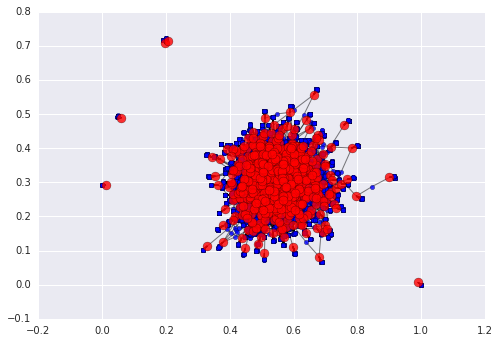

In [771]:
import matplotlib.pyplot as plt
#nx.draw_spectral(G,node_size=100)
#fruchterman_reingold_layout
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=User_nodes,
                       node_color='b',
                       node_size=20,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=Article_nodes,
                       node_color='r',
                       node_size=80,
                   alpha=0.8)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

plt.show()

In [941]:
Num_nodes = len(G.nodes())
Num_edges = len(G.edges())
print "Number of nodes in the graph: %d"%Num_nodes
print "Number of edges in the graph: %d"%Num_edges

Number of nodes in the graph: 34123
Number of edges in the graph: 41030


Here we can see the number of edges and the number of nodes in our network. 

## Tools, theory and analysis

To start off with we will look at some properties of the graph.

### Degree of Graph

Lets start by looking at the degree of the different nodes

In [836]:
G_degree = nx.degree(G)

Finding the users with the highest degrees

In [1062]:
[x for x in sorted(G_degree.items(), key=lambda x:x[1],reverse = True) if len(x[0]) >7][:10]

[(u'1473975796259478', 39),
 (u'808671592549761', 29),
 (u'4858838845699', 29),
 (u'10203621333307114', 26),
 (u'613949675398411', 24),
 (u'1152626974753806', 22),
 (u'142394052866029', 20),
 (u'10205223205253739', 20),
 (u'172839516469889', 16),
 (u'996794790361231', 16)]

Now lets look closer at the top five users:

In [840]:
top_5_users = ['1473975796259478','808671592549761','4858838845699','10203621333307114','613949675398411']

We want to see where the top five users comment

In [854]:
count = 1
for x in top_5_users:
    print "User number:%d"%count
    m = []
    for art in G[x]:
        m += re.findall('[A-Za-z]+',art)
    print Counter(m), len(m)
    print
    count +=1

User number:1
Counter({'WAP': 21, 'CNN': 8, 'NBC': 4, 'FOX': 4, 'CON': 2}) 39

User number:2
Counter({'WAP': 22, 'NBC': 5, 'CNN': 1, 'NYT': 1}) 29

User number:3
Counter({'CNN': 18, 'NBC': 11}) 29

User number:4
Counter({'WAP': 16, 'HUF': 9, 'NYT': 1}) 26

User number:5
Counter({'Br': 11, 'FOX': 6, 'CNN': 4, 'NBC': 3}) 24



Here we see which sites the top five commenters have commented on. While the the top commenter has mostly commented on the Washington Post, the person also has contributed to comments on CNN, MSNBC, Fox News, and the Conservative News Today, so this person has commented on mostly left leaning sites, but also on a few right wing sites. The next three users mostly have commented on left leaning sites, while the last person has mostly commented on right wing websites. 

### Degree distribution

Next we want to find out more by looking at the degree distribution of the network

In [286]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

As we know that there are two different types of nodes, we need to distinguise between the two. However lets first look at the distribution of all the degrees in the network.

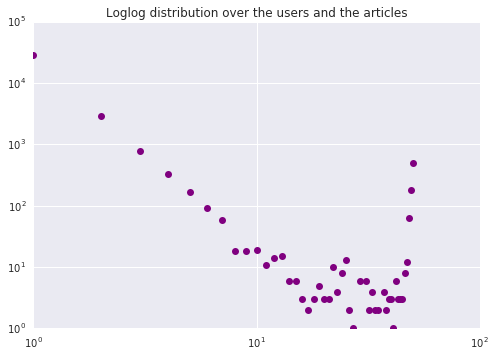

The average degree over the users and the articles are: 2.404830


In [936]:
Degree = nx.degree(G)
coutning_degree = Counter(Degree.values())
plt.loglog(coutning_degree.keys(),coutning_degree.values(),'o',color= 'purple')
plt.title('Loglog distribution over the users and the articles')
plt.show()
print('The average degree over the users and the articles are: %f'%np.mean(Degree.values()))

We now look at the degree of just the users.

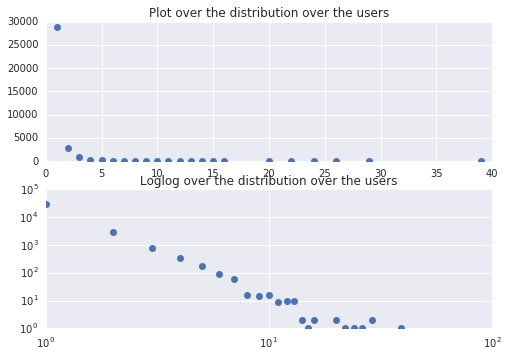

The average degree over the users and the articles are: 1.234988


In [597]:
Users_degree_count = Counter(User_degree.values())

plt.subplot(211)
plt.plot(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.title('Plot over the distribution over the users')

plt.subplot(212)
plt.loglog(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.title('Loglog over the distribution over the users')
plt.show()

print('The average degree over the users and the articles are: %f'%np.mean(User_degree.values()))

We can see that the users' average degree is less that the overall, which is to be expected as we expect most of the articles to have a degree of 50. We can also see that the degree distribution of the users follow a power law.

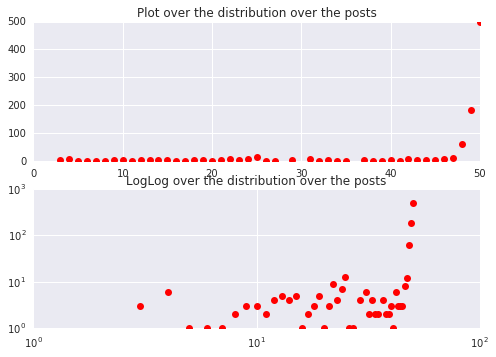

The average degree over the users and the articles are: 47.271429


In [598]:
Article_degree_count = Counter(Arcticle_degree.values())

plt.subplot(211)
plt.plot(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('Plot over the distribution over the posts')

plt.subplot(212)
plt.loglog(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('LogLog over the distribution over the posts')

plt.show()

print('The average degree over the users and the articles are: %f'%np.mean(Arcticle_dict.values()))

Here we see that the degree of the articles are close to what we expected

Finally we plot the two previous plots on top of each other.

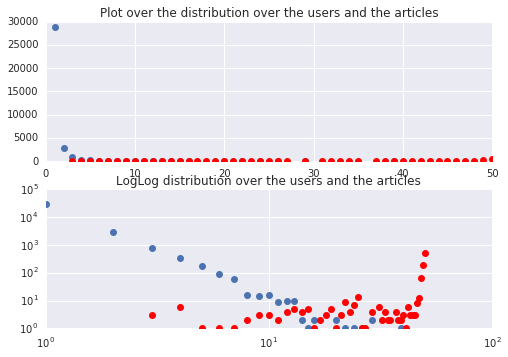

In [599]:
plt.subplot(211)
plt.plot(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.plot(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('Plot over the distribution over the users and the articles')

plt.subplot(212)
plt.loglog(Users_degree_count.keys(),Users_degree_count.values(),'o')
plt.loglog(Article_degree_count.keys(),Article_degree_count.values(),'o', color= 'r')
plt.title('LogLog distribution over the users and the articles')
plt.show()

### Centrality

We want to compute centrality for the graph to find important nodes, however we have a very large graph which makes it hard to compute, so we will use a subset of the graph to compute the betweenness centrality. We expect that the nodes with highest betweenness centrality scores are the ones that have commented on different Facebook pages.

In [948]:
bc = nx.betweenness_centrality(G,k=Num_nodes/20)

In [966]:
bc_sorted = sorted(bc.items(), key=lambda x:x[1],reverse = True)
print bc_sorted[:10]

[(u'1473975796259478', 0.06355737647214882), (u'613949675398411', 0.04725875609966453), (u'1152626974753806', 0.03822283456778271), (u'10203621333307114', 0.03340811038209025), (u'4858838845699', 0.02788209058721533), (u'301461333397970', 0.023300642749951094), (u'808671592549761', 0.022627051472784276), ('TOM37', 0.02066439393001235), ('FOX58', 0.016783039525101573), ('TOM24', 0.016235228823510795)]


In [969]:
print top_5_users

['1473975796259478', '808671592549761', '4858838845699', '10203621333307114', '613949675398411']


We can't get eigenvector centrality to work with 2000 iterations, the method does not converge for our problem.

In [ ]:
eig_central = nx.eigenvector_centrality(G,max_iter = 2000)

Finally we compute the degree assoratativity, we expect this to be close to -1, as we know that most users have a very low degree and are always connected to a high degree article.

In [127]:
degree_assortativity =nx.degree_assortativity_coefficient(G)

In [267]:
print('The degree assortativity is %f'%degree_assortativity)

The degree assortativity is -0.963222


Just as we expected.

### Communities

Next we want to look at communities to see whether the Facebook page they are in already constitutes a good community or if we can find a better community.
We can define the communities in this problem what Facebook page they come from, so the people that only comment on one page are in their own community. So to start off with we can put all the users with one degree into a community. Note that we use regular expressions to find out what news source an article comes from.

In [600]:
#First create all the keys
Communities = {}
for x in User_degree:
    m = []
    for i in G[x]:
        m += re.findall('[A-Za-z]+',i)
    
    m = list(set(m))
    if len(m) == 1:
        Communities[m[0]] = []
    else:
        Communities['Multi'] = []
    #for i in G[x]:
    #    m = re.findall('[A-Za-z]+',i)
    

In [601]:
#Adding all the nodes to a community
for x in User_degree:
    m = []
    for i in G[x]:
        m += re.findall('[A-Za-z]+',i)
        
    m = list(set(m))
    if len(m) == 1:
        Communities[m[0]].append(x)
    else:
        Communities['Multi'].append(x)

Let's now see how many users only use one news source and how many use more than one.

In [602]:
temp = []
for x in Communities:
    temp.append(len(set(Communities[x])))
    print x, len(set(Communities[x]))
                
                
sum(temp)

Multi 1247
FOX 3866
HUF 3623
NYT 3131
NBC 3224
Br 3749
TOM 4330
CNN 3757
CON 3165
WAP 3131


33223

We can look at the degree distribution for each Facebook page

In [603]:
degrees_multi = []
for key in Communities:
    for x in Communities[key]:
        degrees_multi.append(len(G[x]))

    print('Average degree in the %s is:%f'%(key,np.mean(degrees_multi)))

Average degree in the Multi is:3.412189
Average degree in the FOX is:1.668688
Average degree in the HUF is:1.421131
Average degree in the NYT is:1.343052
Average degree in the NBC is:1.331257
Average degree in the Br is:1.301168
Average degree in the TOM is:1.263660
Average degree in the CNN is:1.243399
Average degree in the CON is:1.238801
Average degree in the WAP is:1.234988


We can see that Fox News has the highest degree, meaning that if you only comment on a Fox News article you are more likely to comment multiple times on the Fox News page than people who comment on other pages. Lets now distribute the people who comment on multiple pages into the other communities.

In [604]:
Com_without_multi = Communities.copy()
Com_without_multi.pop('Multi', None)

for x in Communities['Multi']:
    m = []
    for article in G[x]:
        m += re.findall('[A-Za-z]+',article)
    count = Counter(m)
    max_comments = max(count, key=count.get)
    Com_without_multi[max_comments].append(x)

In [605]:
temp = []
for x in Com_without_multi:
    temp.append(len(set(Com_without_multi[x])))
    print x, len(set(Com_without_multi[x]))

FOX 4056
HUF 3713
NYT 3257
CNN 4006
Br 3904
TOM 4346
NBC 3487
WAP 3236
CON 3218


Number of people that have gone from the multi community to the other communities.

In [965]:
print 'FOX', 4056-3866
print 'HUF', 3713-3623
print 'NYT', 3257-3131
print 'NBC', 3487-3224
print 'Br', 3904-3749
print 'TOM', 4346-4330
print 'CNN', 4006-3757
print 'CON', 3218-3165
print 'WAP', 3236-3131

FOX 190
HUF 90
NYT 126
NBC 263
Br 155
TOM 16
CNN 249
CON 53
WAP 105


Here we do some processing so that we can use it later on.

In [610]:
User_to_communities = {}
cat_num = 0 
for cat in Com_without_multi:
    for user in Com_without_multi[cat]:
        User_to_communities[user] = cat_num
    cat_num += 1

In [611]:
categories = {}
count = 0
for cat in Com_without_multi:
    categories[cat] = count
    count += 1
    
print categories

{'HUF': 1, 'FOX': 0, 'NYT': 2, 'NBC': 6, 'Br': 4, 'TOM': 5, 'CNN': 3, 'CON': 8, 'WAP': 7}


In [612]:
User_and_article_communities = User_to_communities.copy()
for x in Arcticle_degree:
    m = re.findall('[A-Za-z]+',x)
    User_and_article_communities[x] = categories[m[0]]

Finally we can find the modularity of our model, and the best partition according to the Louvian-algorithm.

In [684]:
import community
part = community.best_partition(G,partition=User_and_article_communities)
print "Modularity for our model:", community.modularity(User_and_article_communities, G)
print "Louvian model: ", community.modularity(part, G)
community.induced_graph(part, G)
plt.show()

Modularity for our model: 0.846689439891
Louvian model:  0.846966988363


There isn't really that big of a difference between our partition and the one found by the algorithm, this might make us think that each news page creates its own community. Finally we will create a confusion matrix to see where people have moved communities.

In [1064]:
#part_com_as_keys = dict.fromkeys(list(set(part.values())),[]).copy()
part_com_as_keys = {}
for x in set(part.values()):
    part_com_as_keys[x] = []

for x in part:
    #print part[x], x
    part_key = part[x]
    part_com_as_keys[part_key].append(x)
    

In [616]:
#User_and_article_communities_com_as_keys = dict.fromkeys(list(set(part.values())),[]).copy()

User_and_article_communities_com_as_keys = {}
for x in set(part.values()):
    User_and_article_communities_com_as_keys[x] = []

for x in User_and_article_communities:
    User_and_article_communities_com_as_keys[User_and_article_communities[x]].append(x)

In [617]:
conf_matrix = []
for i in part_com_as_keys:
    part_i = []
    for j in User_and_article_communities_com_as_keys:
        count = len(set(part_com_as_keys[i]).intersection(set(User_and_article_communities_com_as_keys[j])))
        part_i.append(count)
        #print x, Us
    conf_matrix.append(part_i)

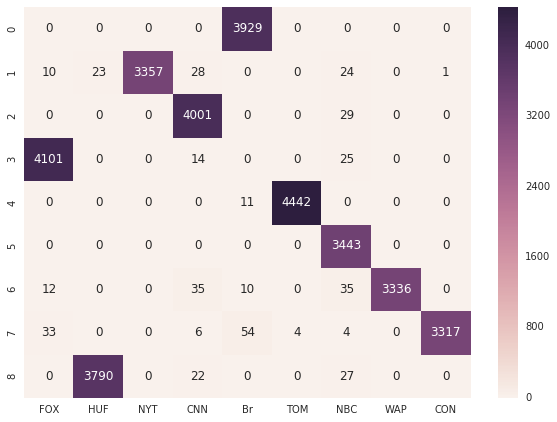

In [633]:
#plt.matshow(conf_matrix)
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(9)],
                  columns = [i[0] for i in cat_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='d')
plt.show()

We rearrange the confusion matrix, so that its a bit prettier

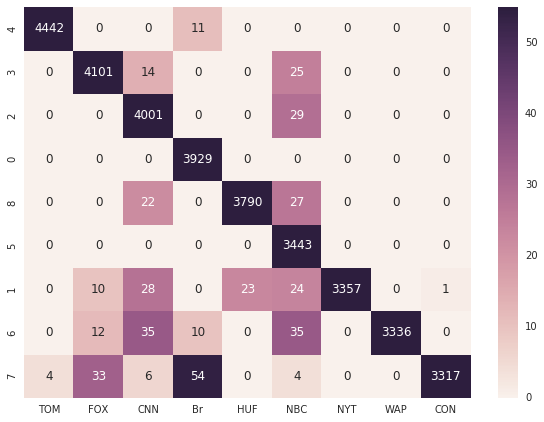

In [689]:
df_cm.index
t2 = df_cm.reindex([4,3,2,0,8,5,1,6,7]) 
cols = t2.columns.tolist()

cols = [cols[5]]+[cols[0]]+[cols[3]]+[cols[4]]+[cols[1]]+[cols[6]]+[cols[2]]+[cols[7]]+[cols[8]]

t2 = df_cm[cols]
t3 = t2.reindex([4,3,2,0,8,5,1,6,7]) 
plt.figure(figsize = (10,7))
sn.heatmap(t3, annot=True,fmt='d',vmin=0, vmax=55)
plt.show()

In group one the the other groups come from the fact that the multi groups have 'guessed' wrong, so for example we have that a user as commented on fox and nyt then it should have been in the nyt group and not the fox group. This is the same with cnn in group 2. Same in 3, 4 this is what happens every time. We rearrange for prettieness. Again all this might mean that people tend to only comment within there own little Facebook communities.



### NLP

Next we want to see if language is used differently within the different communities.

In [692]:
import nltk
import io
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Creating  a dictionary where the key is the user or the article, and the values are the corresponding texts.

In [826]:
#Defining all the keys
text_dict = {}
for x in G:
    text_dict[x] = {}

#Adding the text
for source in All_dict:
    count = 0
    current_dict = All_dict[source]
    for x in current_dict['data']:
        
        node_name = "%s%d"%(source,count)
        try: 
            text_dict[node_name].append(x['message'])
        except:
            pass
        for i in x['comments']['data']:
            user = i['from']['id']
            text_dict[user].append(i['message'])
            
        count += 1

Here we can see an example of how to use this dictionary

In [827]:
for x in text_dict['Br0']:
    print x

REVEALED: A search of state election records was conducted by a Portland television station which reported that of the 112 protesters that were arrested, 69 of them could not be found to have turned in a ballot or were not registered to vote in the Beaver State.


### Sentiment analysis on The communities

We now want to look at the sentiment of the different communities we just found. To do this we use the dataset from the exercises, and also use the function we created from those exercises. We hope to see that the different communities use different language and therefor will have a different sentiment score. 

In [762]:
file = open("Data_Set_S1.txt",'r')
sentiment_table = [row.strip().split('\t') for row in file]

In [763]:
sentiment = {row[0] : {info[1] : row[1], info[2] : row[2], info[3] : row[3], info[4] : row[4], info[5] : row[5], info[6] : row[6], info[7] : row[7]} for row in sentiment_table[4:]}

['word', 'happiness_rank', 'happiness_average', 'happiness_standard_deviation', 'twitter_rank', 'google_rank', 'nyt_rank', 'lyrics_rank']


['happiness', '2', '8.44', '0.9723', '1853', '2458', '--', '1230']


In [816]:
def sentiment_profile(tokens):
    happiness_list = []
    for word in tokens:  
        if word in sentiment:
            happiness_list.append(float(sentiment[word]['happiness_average']))

    if len(happiness_list) == 0:
        print "No words with sentiment attached"
        return 0
    else:
        sentiment_profile = np.mean(happiness_list)
        #print "%d of %d words have sentiment attached"%(len(happiness_list), len(tokens))
        return happiness_list#sentiment_profile

In [808]:
def Process_text(text):
    tmp = re.sub(r'[^a-zA-Z ]',r' ',text) #Remove evreything but words, space comma and period
    lower_tmp = tmp.lower()
    word_tmp = word_tokenize(lower_tmp)
    custom_stopwords = stopwords.words('english')
    no_stopwords = [x for x in word_tmp if x not in custom_stopwords]
    return no_stopwords

Creating the confusion matrix with sentiment analysis.

In [ ]:
conf_sent_matrix = []
for i in part_com_as_keys:
    part_i = []
    for j in User_and_article_communities_com_as_keys:
        count = set(part_com_as_keys[i]).intersection(set(User_and_article_communities_com_as_keys[j]))
        if len(count) > 0:
            for user in count:
                tmp = []
                m = 0
                for text in text_dict[user]:
                    sent = sentiment_profile(Process_text(text))
                    m = np.mean(sent)
                    tmp.append(m)
        else:
            tmp = [0]
        part_i.append(np.mean(tmp))
        #print x, Us
    conf_sent_matrix.append(part_i)

Plotting the sentiment analysis on the communities:

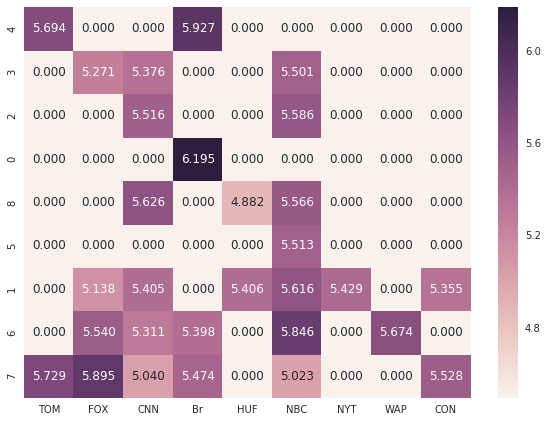

In [902]:

df_cm = pd.DataFrame(conf_sent_matrix, index = [i for i in range(9)],
                  columns = [i[0] for i in cat_list])
df_cm.index
t2 = df_cm.reindex([4,3,2,0,8,5,1,6,7]) 
cols = t2.columns.tolist()

cols = [cols[5]]+[cols[0]]+[cols[3]]+[cols[4]]+[cols[1]]+[cols[6]]+[cols[2]]+[cols[7]]+[cols[8]]

t2 = df_cm[cols]
t3 = t2.reindex([4,3,2,0,8,5,1,6,7]) 

plt.figure(figsize = (10,7))
sn.heatmap(t3, annot=True,fmt='.03f',vmin=4.5)
plt.show()



Here we see the sentiment profile for the different communities. Here we see a group that is happier than average in the big Brietbart group and a group that is sadder than average in the Huffington Post group. This could be explained by the US election, as the data is collected a few days after the election. However there doesn't really seem to be a trend in the happiness profile between groups.

### Word Cloud

Next we will look at the word cloud for the nine different pages, we hope to see a difference in how language is used. 

In [982]:
def Process_text(dict_process): 
    text = ''
    count = 0
    for x in dict_process['data']:
        #print x['message']
        count += 1
        #print count 
        try: 
            text += x['message']
        except:
            pass
        for i in x['comments']['data']:
            text += ' '+i['message']
    
    return text

Before creating the word cloud we remove all the stop words, and some words that were highly used in that time period, like trump. This will give us a better idea of what words are used on the different pages.

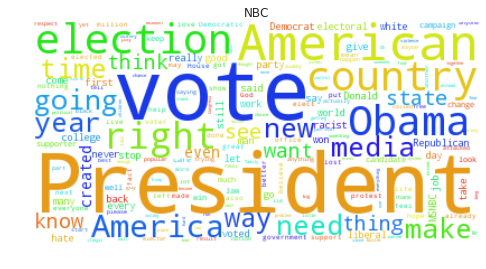

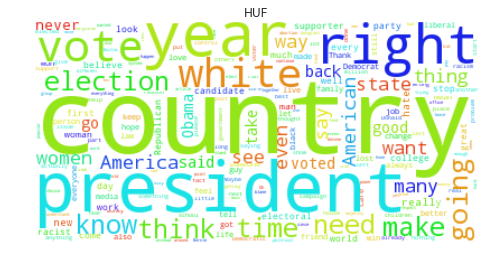

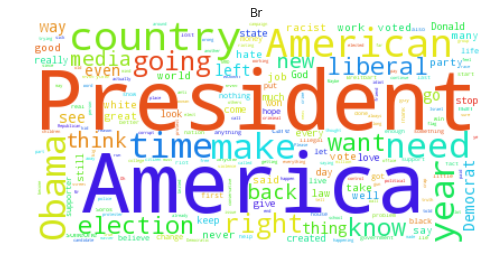

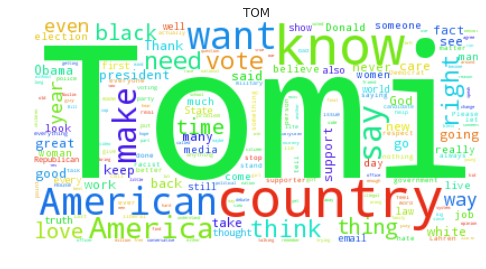

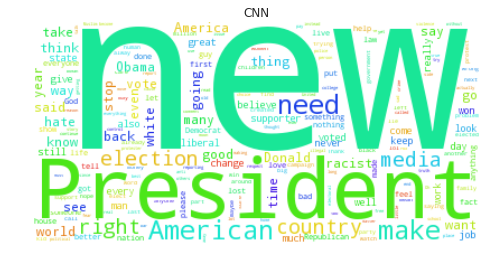

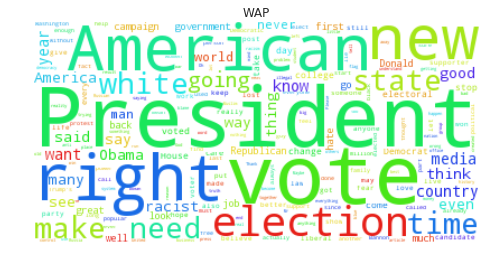

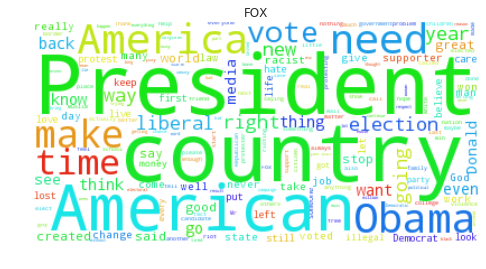

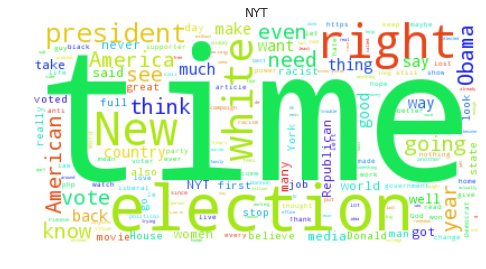

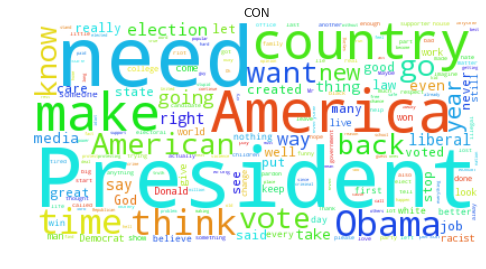

In [1009]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sw = set(STOPWORDS)
sw = sw|set(['trump','will','people','one','us','clinton','cnn','hillary','now'])
for x in All_dict:
    text = Process_text(All_dict[x])
    wc = WordCloud(background_color="white", stopwords=sw).generate(text)
    plt.figure()
    img=plt.imshow(wc)
    tit = 'Word Cloud for %s'%x
    plt.title(x)
    plt.axis('off')
    plt.show()

### Tf-idf

Finally we wanted to compute the tf-idf score, however this never became finished due to time and memory constraints.

In [928]:
import sklearn
tf = sklearn.feature_extraction.text.TfidfVectorizer(text)

In [1020]:
all_text = []
for x in All_dict:
    text = Process_text(All_dict[x])
    all_text.append(text)

In [1030]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(all_text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

## Discussion

Looking back at the project there were some things that went well and others that course didn't. Looking at the distribution of the graphs, went pretty smoothly and we are also very happy about our confusion matrices. However a lot of things did not go so well. The centrality part could have been done a bit quicker, had we realized that we should have used a subset of the nodes to start with. It would also have been nice to have computed the TF-IDF scores so that we could find the words that were the most important to each community, this is probably the first thing that should be implemented that is missing. Another thing that should not be underestimated is the time it takes to create the final product, which we should have thought of. 